In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
s3=pd.read_csv('Meditation experiment with tagging-1/NFB_18-4-2019_0-13_O2.csv',names=['X','Y'])
s3=s3[12:]

C:\Users\Turiya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:

for i in range(12,453860):
    if(s3.Y[i]==39):
        for _ in range(i-1250,i-16250,-1):
            if s3.Y[_]!=0:
                i+=1500
                break
            else:
                s3.Y[i-16250:i-1250]=1

C:\Users\Turiya\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
mapping= {0: ("white", "."), 37: ("blue", "."),39: ("green", "."), 40: ("black", "."),38: ("yellow", "."), 32: ("red", "."),1:("black",".")}

In [7]:
s3.X=s3.X.astype(float)
narrays3=s3.reset_index().values

# O3 file
Black    Mind Wonder Extracted          
Green    Mind Wonder Original               
Blue     Lite Meditation                        
Yellow   Good Meditation            
Red      Peak Experience


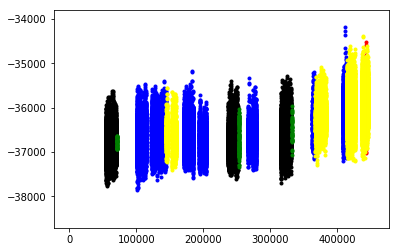

In [63]:
for c in np.unique(narrays3[:,2]):
    d = narrays3[narrays3[:,2] == c]
    plt.scatter(d[:,0], d[:,1], c=mapping[c][0], marker=mapping[c][1])

In [18]:
temp=s3
#rows=temp.shape[0]
temp=temp[temp['Y']!=0]
temp=temp[temp['Y']!=39]
print(temp.tail(5))
print(temp.shape)

               X   Y
445992 -35769.84  38
445993 -35602.02  38
445994 -35494.02  38
445995 -35484.65  38
445996 -35566.33  38
(147054, 2)


In [9]:
temp=temp.reset_index(drop=True)

In [10]:
X=temp['X']
X=X.values.reshape(-1,1)
Y=temp['Y']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

# Models Using Amplitude without chunks
# Accuracy Squed  
# What did it learn (see Fig Above)
34-36k good meditation Yellow
36-37k some meditaion  Blue
37+    Mind Wonder     Black

Totally worng

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)
#knn.score(X_test,y_test)
knn.predict([[-36900]])

array([1], dtype=int64)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
clf.score(X_test,y_test)

In [14]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
model.predict(X_test)
model.score(X_test,y_test)

0.5202151335311572

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear') 
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [3]:
#a=pd.read_csv('trimmedData.csv')